In [79]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
import seaborn as sns
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score




In [3]:
train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train.columns = col_labels
test.columns = col_labels


In [80]:
train.shape,test.shape

((32561, 15), (16281, 15))

In [81]:
train_data=train.copy()
test_data=test.copy()

In [6]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [82]:
full_data=[train_data,test_data]

#### Convert Target class Wage into binary

In [83]:
train_data['wage'] = train_data["wage_class"].apply(lambda x: 0 if x==' <=50K' else 1)
test_data['wage'] = test_data["wage_class"].apply(lambda x: 0 if x==' <=50K' else 1)

#### Drop "wage_class" 

In [84]:
train_data.drop("wage_class",axis=1,inplace=True)
test_data.drop("wage_class",axis=1,inplace=True)

In [85]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Data visualization of persons who make over 50k or not

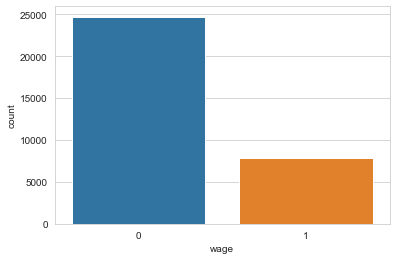

In [84]:
sns.set_style('whitegrid')
sns.countplot(x='wage',data=train_data)

##### Function for plotting

In [88]:
def plot(target,hue):
    sns.set_style('whitegrid')
    sns.countplot(x=target,hue=hue,data=train_data,palette='RdBu_r')

## Data Visualization

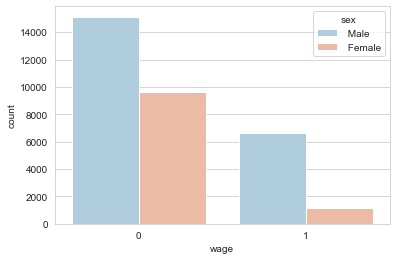

In [89]:
plot('wage','sex')

Male are most likely to make over 50k per year than Female

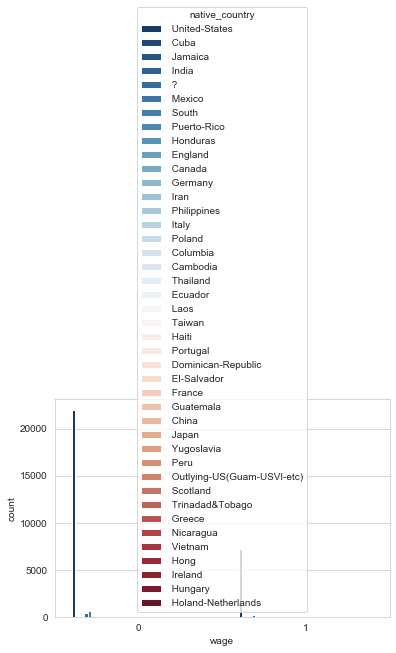

In [90]:
plot('wage','native_country')

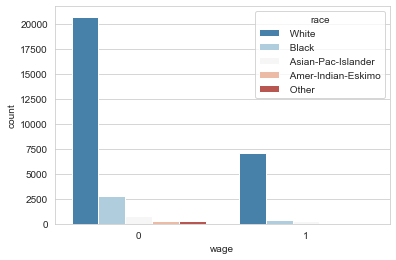

In [92]:
plot('wage','race')

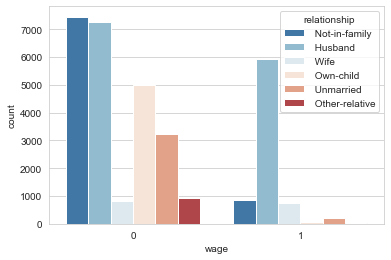

In [94]:
plot('wage','relationship')

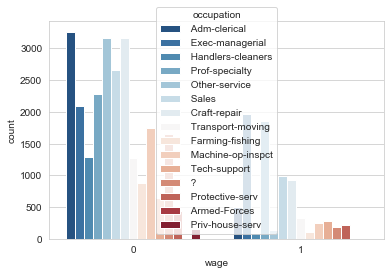

In [95]:
plot('wage','occupation')

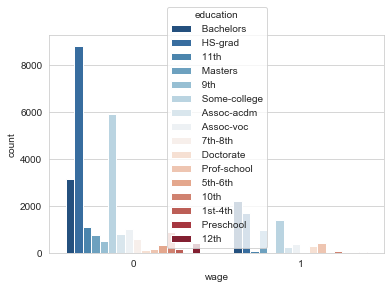

In [98]:
plot('wage','education')

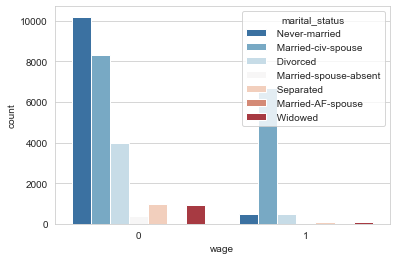

In [101]:
plot('wage','marital_status')

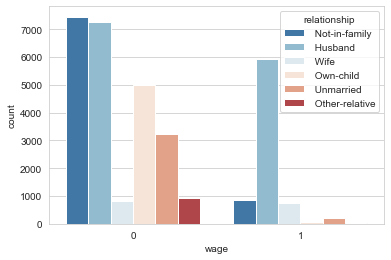

In [117]:
plot('wage','relationship')

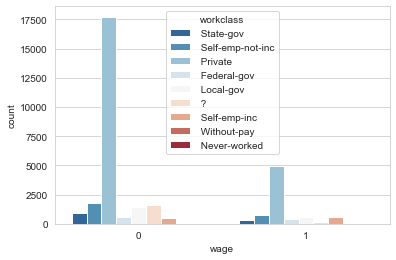

In [105]:
plot('wage','workclass')

In [86]:
train_data.drop('education',axis=1,inplace=True)
test_data.drop('education',axis=1,inplace=True)

## Mapping The Categorical Data into Numerical Form

In [87]:
sex_mapping={' Male': 0, ' Female': 1}
for dataset in full_data:
    dataset['sex'] = dataset['sex'].map(sex_mapping)

In [88]:
race_mapping={' White':1, ' Black':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4,
       ' Other':5}
for dataset in full_data:
    dataset['race'] = dataset['race'].map(race_mapping)

In [89]:
relation_mapping={' Not-in-family':2, ' Husband':0, ' Wife':1, ' Own-child':3, ' Unmarried':4,
       ' Other-relative':5}
for dataset in full_data:
    dataset['relationship'] = dataset['relationship'].map(relation_mapping)

In [90]:
occupation_mapping={' Adm-clerical':0, ' Exec-managerial':1, ' Handlers-cleaners':2,
       ' Prof-specialty':3, ' Other-service':4, ' Sales':5, ' Craft-repair':6,
       ' Transport-moving':7, ' Farming-fishing':8, ' Machine-op-inspct':9,
       ' Tech-support':10, ' ?':11, ' Protective-serv':12, ' Armed-Forces':13,
       ' Priv-house-serv':14}
for dataset in full_data:
    dataset['occupation'] = dataset['occupation'].map(occupation_mapping)

In [91]:
marital_mapping={' Never-married':0, ' Married-civ-spouse':1, ' Divorced':2,
       ' Married-spouse-absent':3, ' Separated':4, ' Married-AF-spouse':5,
       ' Widowed':6}
for dataset in full_data:
    dataset['marital_status'] = dataset['marital_status'].map(marital_mapping)

In [92]:
workclass_mapping={' State-gov':0, ' Self-emp-not-inc':1, ' Private':2, ' Federal-gov':3,
       ' Local-gov':4, ' ?':5, ' Self-emp-inc':6, ' Without-pay':7,
       ' Never-worked':8}
for dataset in full_data:
    dataset['workclass'] = dataset['workclass'].map(workclass_mapping)

In [93]:
train_data.drop('native_country',axis=1,inplace=True)
test_data.drop('native_country',axis=1,inplace=True)

## Drop Rows where any value = '?'

In [94]:
train_data=train_data[train_data.workclass != 5]
train_data=train_data[train_data.occupation != 11]


test_data=test_data[test_data.workclass != 5]
test_data=test_data[test_data.occupation != 11]

In [22]:
train_data.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage
count,30718.000000,30718.000000,3.071800e+04,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,2.147894,1.898455e+05,10.130314,1.074386,4.286412,1.576079,1.218341,0.323263,1106.037079,88.910216,40.949313,0.249040
std,13.118227,1.061312,1.054583e+05,2.562469,1.217380,3.098791,1.537390,0.621965,0.467730,7497.863364,405.657203,11.985382,0.432464
min,17.000000,0.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.178285e+05,9.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,2.000000,1.785170e+05,10.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.000000,2.373170e+05,13.000000,1.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


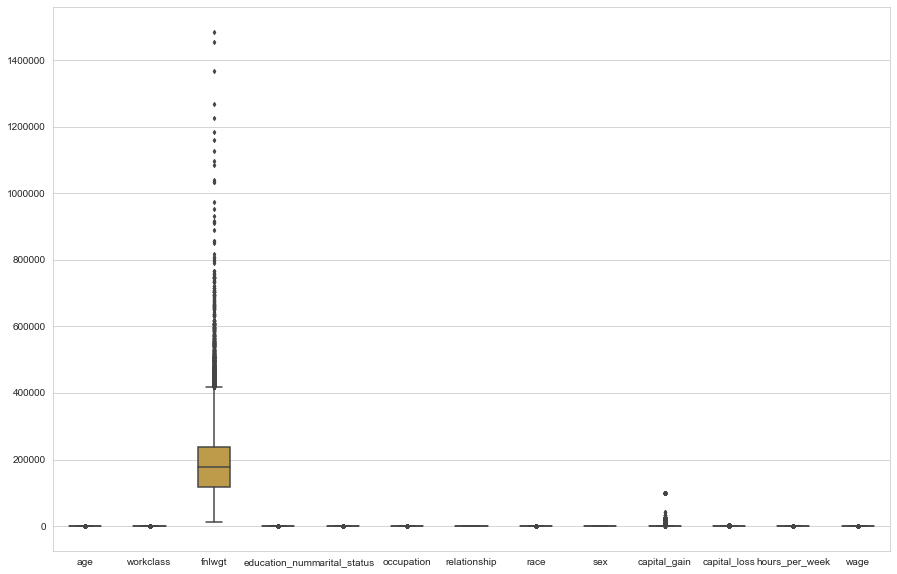

In [165]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=train_data, width= 0.5,ax=ax,  fliersize=3)

(0, 13)

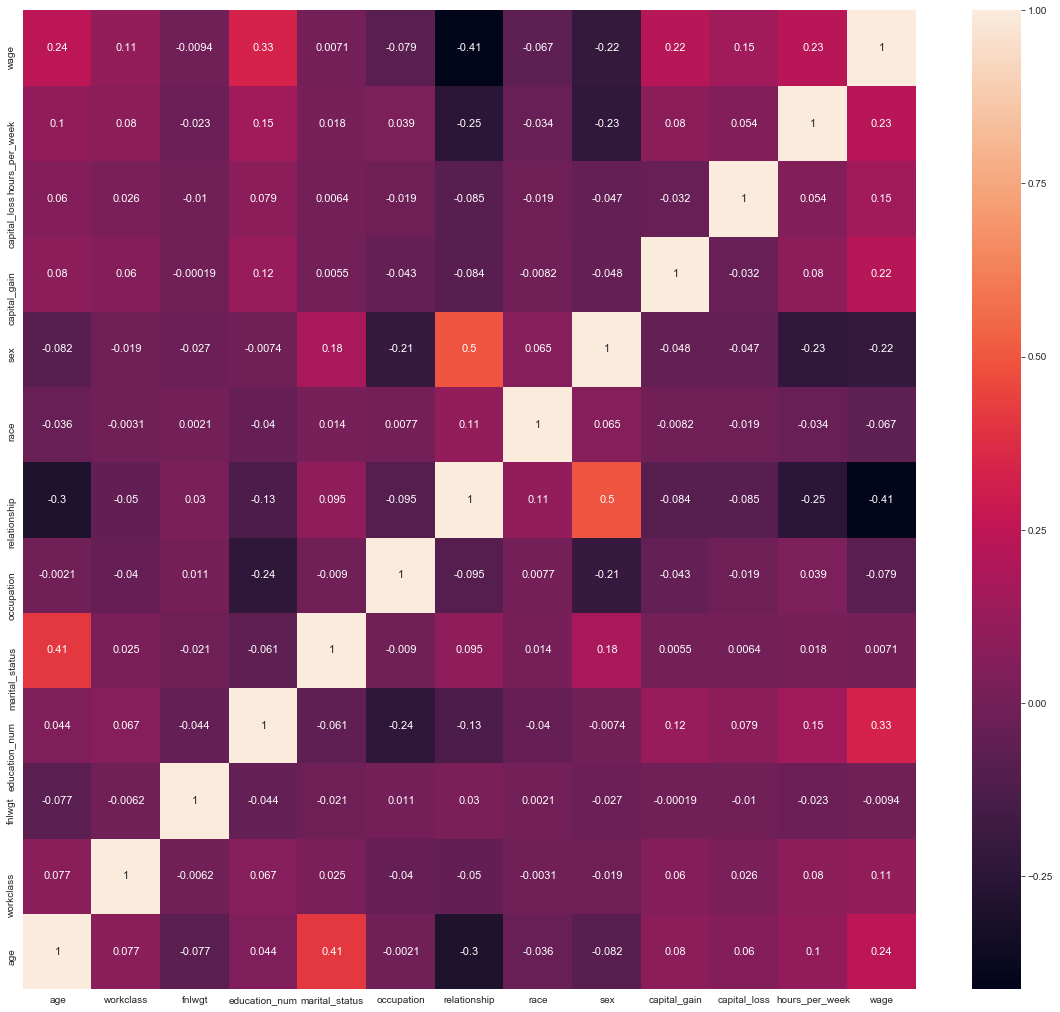

In [168]:
corr = train_data.corr()

fig, ax = plt.subplots(figsize = (20, 18))
sns.heatmap(corr, annot = True, annot_kws={'size': 11})
ax.set_ylim(0 ,13)

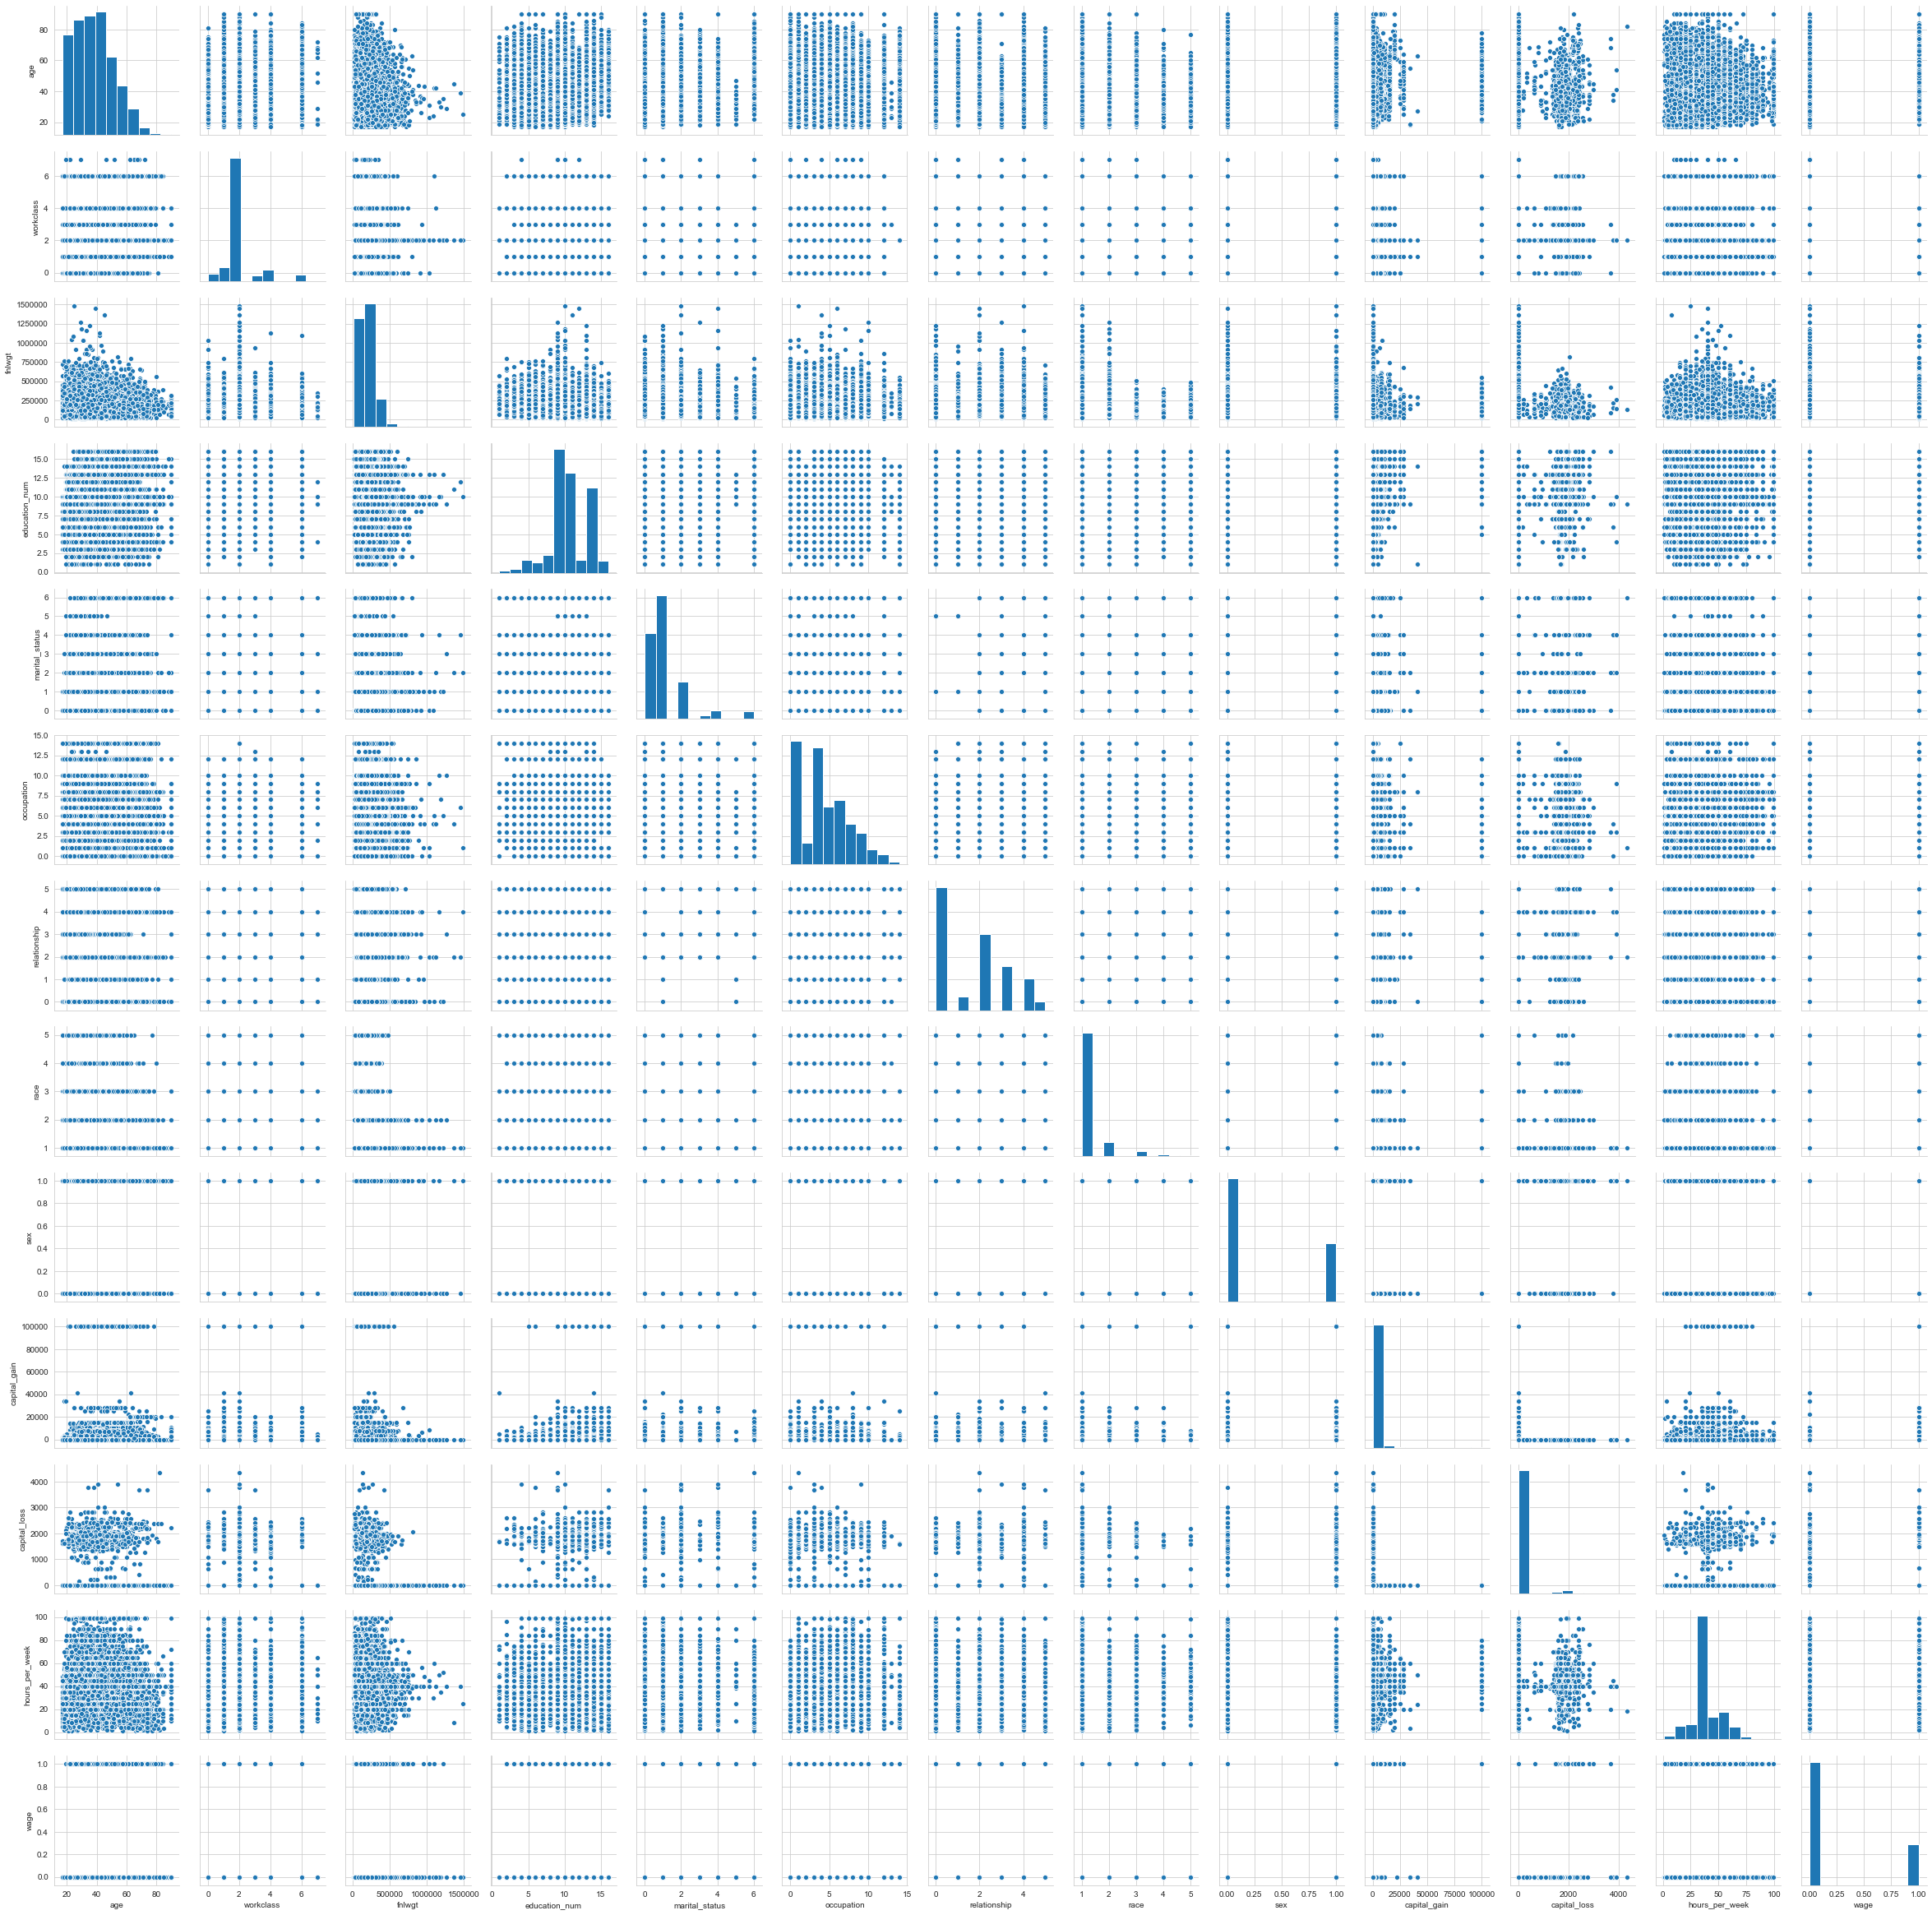

In [170]:
sns.pairplot(train_data)

## Splitting Into data and target Variable

In [95]:
X=train_data.drop('wage',axis=1)
y=train_data['wage']

## Scaling Data

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)
X_scaled=scaler.transform(X)


## Train Test Split

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

In [98]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

## Building First Model

In [99]:
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, y_train)

print("Train Accuracy: ",model.score(X_train, y_train))
print("Test Accuracy: ",model.score(X_test, y_test))

Train Accuracy:  0.8642451864942796
Test Accuracy:  0.8619791666666666


## Bulding Model with Hyperparameters using GridSerch CV

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid={
   
    ' learning_rate':[0.1,0.01,0.001],
    'max_depth': [5,10,15,],
    'n_estimators':[50,100,150],
    
    
}
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

/Users/tanvirislamullash/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.866, total=   1.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.860, total=   1.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.856, total=   1.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.872, total=   2.4s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.865, total=   2.4s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.862, total=   2.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=150, score=0.874, total=   3.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=150, score=0.865, total=   3.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=150 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=150, score=0.865, t

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  5.2min finished


{' learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

In [64]:
model1 = XGBClassifier(objective='binary:logistic', learning_rate= 0.1, max_depth= 5, n_estimators= 150)
model1.fit(X_train, y_train)

print("Train Accuracy: ",model1.score(X_train, y_train))
print("Test Accuracy: ",model1.score(X_test, y_test))

Train Accuracy:  0.8735931541251977
Test Accuracy:  0.8568793402777778
